In [ ]:
# Initialization code that runs before all other cells
import marimo as mo
import polars as pl
from aggregate_simulation_results import (
    parse_array_column,
)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Analysis of Simulation 1 Raw Data

This notebook is dedicated to analyzing the raw data generated from Simulation 1, which includes all replications.

In [ ]:
# Use the relative path from the current working directory
relative_file_path = "outputs/simulation1/simulation1_merged_results.csv"

mo.md(r"""# Imports and data loading""")

with open(relative_file_path, "r") as _f:
    df = pl.read_csv(_f)
# Filter out BF runs
df = df.filter(pl.col("filter_type") != "BF")
# Aggregate array columns
if "num_particles" in df.columns:
    # Cast from string to float first, then to integer
    df_int = df.with_columns(
        pl.col("num_particles").cast(pl.Float64).cast(pl.Int32).fill_nan(0)
    )
group_cols = ["N", "K", "filter_type"]
if "num_particles" in df.columns:
    group_cols.append("num_particles")

# Identify array columns
_array_cols = [
    "pf_rmse_f",
    "pf_corr_f",
    "pf_rmse_h",
    "pf_corr_h",
    "bif_rmse_f",
    "bif_corr_f",
    "bif_rmse_h",
    "bif_corr_h",
]
_array_cols = [col for col in _array_cols if col in df.columns]

# Parse array columns
for col in _array_cols:
    df = pl.from_pandas(parse_array_column(df.to_pandas(), col))


# Display the updated DataFrame
df

<marimo-table data-initial-value='[]' data-label='null' data-data='"./@file/13048-2918213-PgKPfd8A.json"' data-total-rows='13500' data-total-columns='27' data-banner-text='""' data-pagination='true' data-page-size='10' data-field-types='[["study_id", ["string", "str"]], ["run_label", ["string", "str"]], ["N", ["integer", "i64"]], ["K", ["integer", "i64"]], ["T", ["integer", "i64"]], ["num_particles", ["string", "str"]], ["seed", ["integer", "i64"]], ["filter_type", ["string", "str"]], ["rep", ["integer", "i64"]], ["param_gen_time", ["number", "f64"]], ["data_sim_time", ["number", "f64"]], ["bf_filter_time", ["number", "f64"]], ["pf_filter_time", ["string", "str"]], ["bf_rmse_f", ["string", "str"]], ["bf_corr_f", ["string", "str"]], ["bf_rmse_h", ["string", "str"]], ["bf_corr_h", ["string", "str"]], ["pf_rmse_f", ["unknown", "list[f64]"]], ["pf_corr_f", ["unknown", "list[f64]"]], ["pf_rmse_h", ["unknown", "list[f64]"]], ["pf_corr_h", ["unknown", "list[f64]"]], ["error", ["string", "str"]], ["bif_filter_time", ["string", "str"]], ["bif_rmse_f", ["unknown", "list[f64]"]], ["bif_corr_f", ["unknown", "list[f64]"]], ["bif_rmse_h", ["unknown", "list[f64]"]], ["bif_corr_h", ["unknown", "list[f64]"]]]' data-show-filters='true' data-show-download='true' data-show-column-summaries='true' data-row-headers='[]' data-has-stable-row-id='false' data-lazy='false' data-preload='false'>

In [ ]:
# Apply the function to your DataFrame
df_consolidated = consolidate_filter_metrics(df)

# Display the updated DataFrame
df_consolidated.head()
# remove columns that start with BF (case-insensitive)
columns_to_drop = [
    col for col in df_consolidated.columns if col.lower().startswith("bf")
]
df_consolidated = df_consolidated.drop(columns_to_drop)

array_cols = ["corr_f", "rmse_f", "corr_h", "rmse_h"]
# Aggregate mean for each column
# Calculate the mean for each array column and replace the original column
df_consolidated = df_consolidated.with_columns(
    [pl.col(col).list.mean().alias(col) for col in array_cols]
)
df_consolidated = df_consolidated.with_columns(
    pl.when(pl.col("filter_type") == "BIF")
    .then(pl.lit("BIF"))
    .otherwise(
        pl.lit("PF ")
        + pl.col("num_particles").cast(pl.Float64).cast(pl.Int32).cast(pl.Utf8)
    )
    .alias("config_id")
)

# Display the updated DataFrame with the new column
# Display the updated DataFrame with mean values
df_consolidated

<marimo-table data-initial-value='[]' data-label='null' data-data='"./@file/4394-2918213-1xmTHu4u.json"' data-total-rows='13500' data-total-columns='18' data-banner-text='""' data-pagination='true' data-page-size='10' data-field-types='[["study_id", ["string", "str"]], ["run_label", ["string", "str"]], ["N", ["integer", "i64"]], ["K", ["integer", "i64"]], ["T", ["integer", "i64"]], ["num_particles", ["string", "str"]], ["seed", ["integer", "i64"]], ["filter_type", ["string", "str"]], ["rep", ["integer", "i64"]], ["param_gen_time", ["number", "f64"]], ["data_sim_time", ["number", "f64"]], ["error", ["string", "str"]], ["rmse_f", ["number", "f64"]], ["corr_f", ["number", "f64"]], ["rmse_h", ["number", "f64"]], ["corr_h", ["number", "f64"]], ["filter_time", ["number", "f64"]], ["config_id", ["string", "str"]]]' data-show-filters='true' data-show-download='true' data-show-column-summaries='true' data-row-headers='[]' data-has-stable-row-id='false' data-lazy='false' data-preload='false'>

In [ ]:
N = 100
K = 10
df_filtered = df_consolidated.filter(pl.col("N").eq(N) & pl.col("K").eq(K))

# df_filtered.group_by(
#     ["N", "K", "filter_type"])
df_filtered

<marimo-table data-initial-value='[]' data-label='null' data-data='"./@file/4394-2918213-hrT3SsS1.json"' data-total-rows='500' data-total-columns='18' data-banner-text='""' data-pagination='true' data-page-size='10' data-field-types='[["study_id", ["string", "str"]], ["run_label", ["string", "str"]], ["N", ["integer", "i64"]], ["K", ["integer", "i64"]], ["T", ["integer", "i64"]], ["num_particles", ["string", "str"]], ["seed", ["integer", "i64"]], ["filter_type", ["string", "str"]], ["rep", ["integer", "i64"]], ["param_gen_time", ["number", "f64"]], ["data_sim_time", ["number", "f64"]], ["error", ["string", "str"]], ["rmse_f", ["number", "f64"]], ["corr_f", ["number", "f64"]], ["rmse_h", ["number", "f64"]], ["corr_h", ["number", "f64"]], ["filter_time", ["number", "f64"]], ["config_id", ["string", "str"]]]' data-show-filters='true' data-show-download='true' data-show-column-summaries='true' data-row-headers='[]' data-has-stable-row-id='false' data-lazy='false' data-preload='false'>

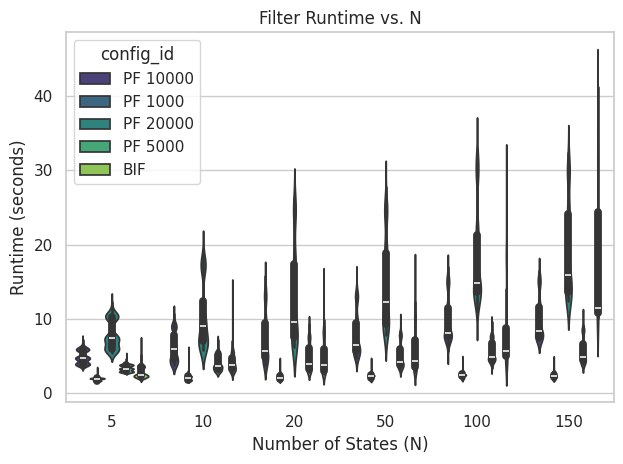

In [ ]:
# Create the violin plot
sns.violinplot(
    data=df_consolidated,
    x="N",
    y="filter_time",
    hue="config_id",
    inner="box",  # Show box plot inside violin
    palette="viridis",  # Use a pleasant color palette
)



# Set title and labels using matplotlib
plt.title("Filter Runtime vs. N")
plt.xlabel("Number of States (N)")
plt.ylabel("Runtime (seconds)")

# Improve layout
plt.tight_layout()

# Return the current axes object as per the rule for matplotlib
plt.gca()

In [ ]:
def consolidate_filter_metrics(df: pl.DataFrame) -> pl.DataFrame:
    """
    Consolidates filter-specific metric columns (like pf_rmse_f, bif_rmse_f)
    into general metric columns (like rmse_f) based on the 'filter_type' column.

    Args:
        df: The input Polars DataFrame with filter-specific columns.

    Returns:
        A new Polars DataFrame with consolidated metric columns.
    """
    # Define the base metric names and the filter types to consolidate
    metric_names = ["rmse_f", "corr_f", "rmse_h", "corr_h"]
    filter_types = ["PF", "BIF"]  # Add other filter types if needed

    # List to hold expressions for the new consolidated columns
    new_columns_exprs = []

    # Create expressions for metric columns (rmse_f, corr_f, etc.)
    for metric in metric_names:
        expr = None
        for f_type in filter_types:
            col_name = f"{f_type.lower()}_{metric}"
            if col_name in df.columns:
                if expr is None:
                    expr = pl.when(pl.col("filter_type") == f_type).then(
                        pl.col(col_name)
                    )
                else:
                    expr = expr.when(pl.col("filter_type") == f_type).then(
                        pl.col(col_name)
                    )

        if expr is not None:
            # Add an otherwise clause to handle filter types not explicitly listed
            expr = expr.otherwise(None).alias(metric)
            new_columns_exprs.append(expr)

    # Handle the filter_time column separately due to casting
    filter_time_expr = None
    cols_to_cast = []
    temp_cols_to_drop = []

    for f_type in filter_types:
        col_name = f"{f_type.lower()}_filter_time"
        temp_col_name = f"_{f_type.lower()}_filter_time_float"
        if col_name in df.columns:
            # Cast to float first
            cols_to_cast.append(
                pl.col(col_name).cast(pl.Float64).alias(temp_col_name)
            )
            temp_cols_to_drop.append(temp_col_name)

            # Build the conditional expression
            if filter_time_expr is None:
                filter_time_expr = pl.when(
                    pl.col("filter_type") == f_type
                ).then(pl.col(temp_col_name))
            else:
                filter_time_expr = filter_time_expr.when(
                    pl.col("filter_type") == f_type
                ).then(pl.col(temp_col_name))

    if filter_time_expr is not None:
        filter_time_expr = filter_time_expr.otherwise(None).alias(
            "filter_time"
        )
        new_columns_exprs.append(filter_time_expr)

    # Apply casting for filter_time columns first
    if cols_to_cast:
        df = df.with_columns(cols_to_cast)

    # Apply the consolidation expressions
    if new_columns_exprs:
        df = df.with_columns(new_columns_exprs)

    # Identify original filter-specific columns to drop
    cols_to_drop = []
    for f_type in filter_types:
        for metric in metric_names:
            col_name = f"{f_type.lower()}_{metric}"
            if col_name in df.columns:
                cols_to_drop.append(col_name)
        # Add original filter_time columns and temporary cast columns to drop list
        original_time_col = f"{f_type.lower()}_filter_time"
        if original_time_col in df.columns:
            cols_to_drop.append(original_time_col)

    # Add the temporary float columns to the drop list
    cols_to_drop.extend(temp_cols_to_drop)

    # Drop the original filter-specific columns
    df = df.drop(cols_to_drop)

    return df